<a href="https://colab.research.google.com/github/Marcel-Milosz/Dane/blob/Code-Review/Milosz_Marcel_02_niestacj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression score: 0.513384133144162
R^2 score: 0.5055513109342389, MSE error: 56.2764936580276

Lasso r2-Test: 64.8606521794203, rmse-Test 0.34320507101614584 
Lasso r2-Train: 61.682798867083996, rmse-Train: 0.33998494474705787

Ridge r2-Test: 62.102114371115206, rmse-Test 0.39788431315019224 
Ridge r2-Train: 57.44746047436472, rmse-Train: 0.42751070687650716

Alpha: 1, Test: 0.39788431315019224, Train: 0.42751070687650716
Alpha: 2, Test: 0.32620960849552394, Train: 0.36045366038700355
Alpha: 3, Test: 0.27783733554349854, Train: 0.31170958054059206
Alpha: 4, Test: 0.24232148893373762, Train: 0.27458095038659236
Alpha: 5, Test: 0.2149325209506595, Train: 0.24532334945464607
Alpha: 6, Test: 0.19309886185346048, Train: 0.22167003172010102
Alpha: 7, Test: 0.17526021187595864, Train: 0.2021541433450742
Alpha: 8, Test: 0.1604012988332909, Train: 0.18578053036621656
Alpha: 9, Test: 0.14782825687906898, Train: 0.1718492839080803
Alpha: 10, Test: 0.1370489631352534, Train: 0.159853630553

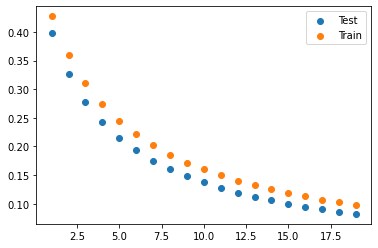



Lasso A: 1, Score: 0.5064859448286885
Lasso A: 2, Score: 0.5064859448286885
Lasso A: 3, Score: 0.5064859448286885
Lasso A: 4, Score: 0.5064859448286885
Lasso A: 5, Score: 0.5064859448286885
Lasso A: 6, Score: 0.5064859448286885
Lasso A: 7, Score: 0.5064859448286885
Lasso A: 8, Score: 0.5064859448286885
Lasso A: 9, Score: 0.5064859448286885
Lasso A: 10, Score: 0.5064859448286885
Lasso A: 11, Score: 0.5064859448286885
Lasso A: 12, Score: 0.5064859448286885
Lasso A: 13, Score: 0.5071147095839086
Lasso A: 14, Score: 0.5070564087192162
Lasso A: 15, Score: 0.5070077101037671
Lasso A: 16, Score: 0.5069665756706127
Lasso A: 17, Score: 0.5069313562596648
Lasso A: 18, Score: 0.5069007887624547
Lasso A: 19, Score: 0.5068741378777539


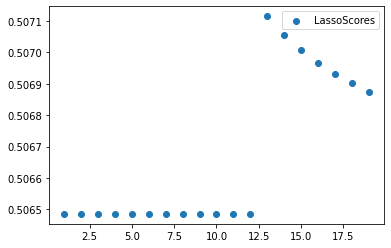

In [1]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import numpy as np

regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()

diabetes = load_diabetes()
data, target = diabetes.data, diabetes.target

train_x, test_x, train_y, test_y = train_test_split(data, target)


def linearRegr():
    '''
    Returns regression Score
    '''

    regression.fit(train_x, train_y)
    reg_Score = regression.score(train_x, train_y)

    return reg_Score

def rmse():
    '''
    Returns R2 score and MSE
    '''

    regression.fit(train_x, train_y)
    pred = regression.predict(test_x)

    return r2_score(test_y, pred), mean_squared_error(test_y, pred, squared=False)

def lassoFunc():
    '''
    Uses lasso to get Test / Train Score
    '''

    lasso.fit(train_x, train_y)

    lasso_pred_test = lasso.predict(test_x)
    lasso_r2_Test = np.sqrt(mean_squared_error(test_y, lasso_pred_test))
    rmse_Test = r2_score(test_y, lasso_pred_test)

    lasso_pred_train = lasso.predict(train_x)
    lasso_r2_Train = np.sqrt(mean_squared_error(train_y, lasso_pred_train))
    rmse_Train = r2_score(train_y, lasso_pred_train)

    return lasso_r2_Test, rmse_Test, lasso_r2_Train, rmse_Train

def ridgeFunc():
    '''
    Uses ridge to get Test / Train Score
    '''

    ridge.fit(train_x, train_y)

    ridge_pred_test = ridge.predict(test_x)
    ridge_r2_Test = np.sqrt(mean_squared_error(test_y, ridge_pred_test))
    rmse_Test = r2_score(test_y, ridge_pred_test)

    ridge_pred_train = ridge.predict(train_x)
    ridge_r2_Train = np.sqrt(mean_squared_error(train_y, ridge_pred_train))
    rmse_Train = r2_score(train_y, ridge_pred_train)

    return ridge_r2_Test, rmse_Test, ridge_r2_Train, rmse_Train

def ridgeAlpha(a):
    '''
    Returns ridge Test Train score changing alpha parameter
    '''

    ridge = Ridge(alpha=a)
    ridge.fit(train_x, train_y)

    ridge_pred_test = ridge.predict(test_x)
    ridge_r2_Test = np.sqrt(mean_squared_error(test_y, ridge_pred_test))
    rmse_Test = r2_score(test_y, ridge_pred_test)

    ridge_pred_train = ridge.predict(train_x)
    ridge_r2_Train = np.sqrt(mean_squared_error(train_y, ridge_pred_train))
    rmse_Train = r2_score(train_y, ridge_pred_train)

    return rmse_Test, rmse_Train

def ridgeAlphaScorePlot():

    '''
    Displays Ridge Train Test Score Plot with change in alpha
    '''

    x   = []
    y   = []
    y1  = []


    for i in range(1, 20):

      x.append(i)
      y.append(ridgeAlpha(i)[0])
      y1.append(ridgeAlpha(i)[1])

      print(f"Alpha: {i}, Test: {ridgeAlpha(i)[0]}, Train: {ridgeAlpha(i)[1]}")

    plt.scatter(x, y)
    plt.scatter(x, y1)
    plt.legend(["Test", "Train"])
    plt.show()

def Lasso_Cv():

  '''
  Using LassoCV to get Test Train score with change in Alpha
  '''

  # Lasso 
  LassoScores = []
  alphas = []
  for i in range(1, 20):
    reg = LassoCV(n_alphas = i, cv = 4, random_state = 0).fit(train_x, train_y)
    regScore = reg.score(test_x, test_y)
    LassoScores.append(regScore)
    alphas.append(i)
    print(f"Lasso A: {i}, Score: {regScore}")

  plt.scatter(alphas, LassoScores)
  plt.legend(["LassoScores"])
  plt.show()



print(f"Linear Regression score: {linearRegr()}")
print(f"R^2 score: {rmse()[0]}, MSE error: {rmse()[1]}\n")
print(f"Lasso r2-Test: {lassoFunc()[0]}, rmse-Test {lassoFunc()[1]} \nLasso r2-Train: {lassoFunc()[2]}, rmse-Train: {lassoFunc()[3]}\n")
print(f"Ridge r2-Test: {ridgeFunc()[0]}, rmse-Test {ridgeFunc()[1]} \nRidge r2-Train: {ridgeFunc()[2]}, rmse-Train: {ridgeFunc()[3]}\n")

ridgeAlphaScorePlot()

print()
print()

Lasso_Cv()

